In [1]:
def print_test_results(results):
    total = sum(results.values())
    precision = results['TP']/(results['TP']+results['FP'])
    recall = results['TP']/(results['TP']+results['FN'])
    
    print(results, '\n')
    
    print("Accuracy score:")
    print(f"{(results['TP']+results['TN'])/total}\n")
    
    print("Precision score:")
    print(f"{precision}\n")
    
    print("Recall score:")
    print(f"{recall}\n")
    
    print("F1 score:")
    print(f"{2*precision*recall/(precision+recall)}\n")

In [2]:
sc.addPyFile("../Pattern_extraction/Pattern_Extractor.py")
sc.addPyFile("../Pattern_extraction/Additional_tools.py")


import time
from Pattern_Extractor import Pattern_Extractor as Extractor
import os


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#parameters
support = 0.001
interval = 30 #time window
maxDelta = 3 #how many spatial deltas
th = 0.5 #distance (seems in km)
window_size = 3 #how many time deltas

neighborhood_type = 'indegree'
n_neighbors = 10
extraction_type = 'Full-AlmostFull' # Full-AlmostFull or Empty-AlmostEmpty or 'Full-Decrease' or 'Empty-Increase'
incr_dec_threshold = 1 # 0 for threshold > 0
wrap_states=True
state_change = False

In [4]:
status_path  = "datasets/SanFrancisco_status_train.csv" 
stations_path = "bike_sharing/station.csv"

ext = Extractor(interval, maxDelta, th, window_size, status_path, stations_path, spark, sc)

In [ ]:
df = ext.extract_items(extraction_type=extraction_type, neighborhood_type=neighborhood_type,
                       n_neighbors=n_neighbors, incr_dec_threshold=incr_dec_threshold, 
                       wrap_states=wrap_states, state_change=state_change)

In [6]:
support = 0.001
prefix = ext.extract_frequent_items(df, support)

In [7]:
output_file = f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/{n_neighbors if neighborhood_type=='indegree' else 'Dist'}_{incr_dec_threshold}_{interval}_{int(th*1000)}_{support}({window_size}-{maxDelta}).txt"

if not os.path.exists(f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/"):
    os.makedirs(f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/")

ext.save_classification_patterns(prefix, output_file)

../../Results/Classification_patterns/Full-AlmostFull_wrapped/Dist_1_30_500_0.001(3-3).txt  saved successfully.


In [8]:
# next directories needs to be modified every time

#!hdfs dfs -mkdir ./Classification_patterns/Full-AlmostFull_wrapped/
!hdfs dfs -put "../../Results/Classification_patterns/Full-AlmostFull_wrapped/Dist_1_30_500_0.001(3-3).txt" ./Classification_patterns/Full-AlmostFull_wrapped/

In [9]:
!hdfs dfs -ls Classification_patterns/Full-AlmostFull_wrapped

Found 2 items
-rw-r-----   3 s287791 students     323622 2022-04-14 15:07 Classification_patterns/Full-AlmostFull_wrapped/10_1_30_500_0.001(3-3).txt
-rw-r-----   3 s287791 students      67226 2022-04-14 15:27 Classification_patterns/Full-AlmostFull_wrapped/Dist_1_30_500_0.001(3-3).txt


In [6]:
status_path_test  = "datasets/SanFrancisco_status_test.csv"

test_ext = Extractor(interval, maxDelta, th, window_size, status_path_test, stations_path, spark, sc)
df_t = test_ext.extract_items(extraction_type=extraction_type, neighborhood_type=neighborhood_type,
                       n_neighbors=n_neighbors, incr_dec_threshold=incr_dec_threshold, 
                       wrap_states=wrap_states, state_change=state_change, for_test=True)

File:  ./Classification_patterns/Full-AlmostFull_wrapped/10_1_30_500_0.001(3-3).txt


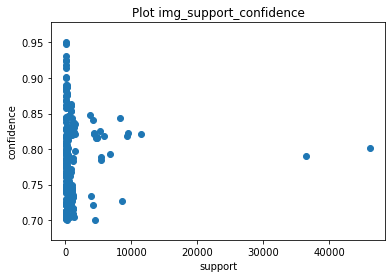

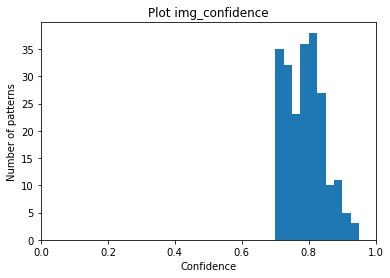

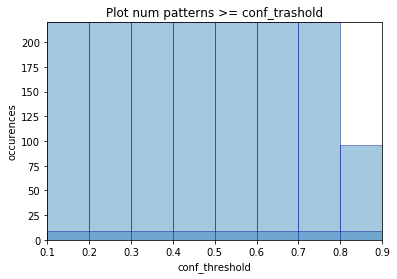

In [10]:
conf_threshold = 0.7
sup_threshold = 0
patterns_file = f"./Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/{n_neighbors if neighborhood_type=='indegree' else 'Dist'}_{incr_dec_threshold}_{interval}_{int(th*1000)}_{support}({window_size}-{maxDelta}).txt"

print("File: ", patterns_file)

filtered_patterns = ext.filter_patterns_conf_sup(patterns_file, conf_threshold, sup_threshold, target='AlmostFull')
ext.print_patterns_stats(filtered_patterns)
rules = filtered_patterns.collect()

In [11]:
match_threshold = 2

results = test_ext.test_rules(df_t, rules, match_threshold)
print_test_results(results)

{'TN': 275027, 'FP': 5981, 'TP': 17061, 'FN': 5259} 

Accuracy score:
0.9629444034180821

Precision score:
0.7404305181841854

Recall score:
0.7643817204301075

F1 score:
0.7522155107799479



In [14]:
#test_ext.logga(df_t, rules).filter(lambda x:x!=None).saveAsTextFile('logs')

# Experimental results

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/5_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9574071960122416

Precision score:
0.6670102064563317

Recall score:
0.780115094486352

F1 score:
0.7191426062333099

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9663600832776156

Precision score:
0.7590183667922183

Recall score:
0.7600513259195893

F1 score:
0.7595344951526102

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/10_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.2
sup threshold = 0
match threshold = 1**

Accuracy score:
0.7642941980653876

Precision score:
0.21961577350859454

Recall score:
0.9290352684994362

F1 score:
0.35525288646687536

**conf threshold = 0.2
sup threshold = 0
match threshold = 2**

Accuracy score:
0.7881710873565281

Precision score:
0.23782795979637122

Recall score:
0.9210250029163588

F1 score:
0.37803846460777274

**conf threshold = 0.2
sup threshold = 0
match threshold = 3**

Accuracy score:
0.808995757333616

Precision score:
0.2554256545364729

Recall score:
0.9047711630439009

F1 score:
0.398383727699209

**conf threshold = 0.2
sup threshold = 0
match threshold = 4**

Accuracy score:
0.8147903535736515

Precision score:
0.2348942126245017

Recall score:
0.7308784072792316

F1 score:
0.35552697283801166

**conf threshold = 0.2
sup threshold = 0
match threshold = 5**

Accuracy score:
0.8191009678497754

Precision score:
0.23165170768887078

Recall score:
0.6854609791188708

F1 score:
0.3462785078672874

**conf threshold = 0.3
sup threshold = 0
match threshold = 1**

Accuracy score:
0.932253233640186

Precision score:
0.5095825357982215

Recall score:
0.8178247851615663

F1 score:
0.6279146141215106

**conf threshold = 0.3
sup threshold = 0
match threshold = 3**

Accuracy score:
0.9392029440462698

Precision score:
0.5439254788769352

Recall score:
0.8060426954932535

F1 score:
0.6495370297836339

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9579321010303619

Precision score:
0.6712952119650685

Recall score:
0.7801454290935956

F1 score:
0.7216387310265449

**conf threshold = 0.5
sup threshold = 0
match threshold = 2**

Accuracy score:
0.9589730627376477

Precision score:
0.6804621134896365

Recall score:
0.7787066920713924

F1 score:
0.7262770413621774

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.966368511316042

Precision score:
0.7590773173857326

Recall score:
0.7600808803515184

F1 score:
0.7595787673894459

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9583969776859729

Precision score:
0.6752761314655172

Recall score:
0.779756581249757

F1 score:
0.7237651814556151

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9663686027233441

Precision score:
0.7590773173857326

Recall score:
0.7600808803515184

F1 score:
0.7595787673894459

**conf threshold = 0.8
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9317478868262985

Precision score:
0.7669902912621359

Recall score:
0.03379087762958354

F1 score:
0.06472998137802607

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/Dist_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9587937922974479

Precision score:
0.6788303855797249

Recall score:
0.7790566551308473

F1 score:
0.7254983614274593

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9663604489984507

Precision score:
0.7589888949289431

Recall score:
0.7600808803515184

F1 score:
0.7595344951526102

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped_stateChange/10_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.5
sup threshold = 0**

No rules survive

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped_stateChange_Dist/10_1_30_500_0.001(3-3).txt"$$

**conf threshold = 0.5
sup threshold = 0**

No rules survive

$$patterns_file:  ./Classification_patterns/Full-AlmostFull_wrapped/10_1_30_500_0.001(3-3).txt$$

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9585267433273552

Precision score:
0.6769236358352103

Recall score:
0.8348118279569893

F1 score:
0.7476226778477711

**conf threshold = 0.5
sup threshold = 0
match threshold = 2**

Accuracy score:
0.9603168846924781

Precision score:
0.6912404686628232

Recall score:
0.8326164874551971

F1 score:
0.7553703891880907

**conf threshold = 0.5
sup threshold = 0
match threshold = 3**

Accuracy score:
0.9621004325350775

Precision score:
0.7318368745716244

Recall score:
0.7654121863799284

F1 score:
0.7482480728801681

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9623905475261103

Precision score:
0.7089140756624291

Recall score:
0.8294802867383513

F1 score:
0.7644727062515484

**conf threshold = 0.7
sup threshold = 0
match threshold = 2**

Accuracy score:
0.9629444034180821

Precision score:
0.7404305181841854

Recall score:
0.7643817204301075

F1 score:
0.7522155107799479

**conf threshold = 0.8
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9688291222702817

Precision score:
0.7724827381708815

Recall score:
0.8170250896057347

F1 score:
0.7941298147059463

**conf threshold = 0.9
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9264360692056124

Precision score:
0.6875

Recall score:
0.000492831541218638

F1 score:
0.0009849570200573066

$$patterns_file:  ./Classification_patterns/Full-AlmostFull_wrapped/Dist_1_30_500_0.001(3-3).txt$$

**conf threshold = 0.5
sup threshold = 0
match threshold = 1**

Accuracy score:
0.955427787741323

Precision score:
0.6534705266829438

Recall score:
0.8393817204301075

F1 score:
0.7348499705824671

**conf threshold = 0.7
sup threshold = 0
match threshold = 1**

Accuracy score:
0.9647147642156345

Precision score:
0.7305600762116461

Recall score:
0.8245967741935484

F1 score:
0.7747353355923643

**conf threshold = 0.7
sup threshold = 0
match threshold = 2**

Accuracy score:
0.9634125435172487

Precision score:
0.7348878097789685

Recall score:
0.7865143369175627

F1 score:
0.7598251385041551

**conf threshold = 0.7
sup threshold = 0
match threshold = 3**

Accuracy score:
0.950347478636987

Precision score:
0.7166477645794783

Recall score:
0.5379032258064517

F1 score:
0.6145420111074144